## Sentiment Analysis with Hugging Face

In this project we are going to use Sentiment analysis using text classification model to determine Covid information  based on the input features from the given dataset.

### Mounting The drive with datasets

In [1]:
!pip3 install -qU transformers[all] datasets accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 105.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 89.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.7/454.7 kB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 119.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.1/590.1 kB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadat

In [2]:
#Disable  W&B
import os
os.environ['WANDB_DISABLED'] = 'true'

In [3]:
#Account Authentication
from google.colab import auth
auth.authenticate_user()

In [4]:
# Mounting the datasets/requirements text file from Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.INSTALLATION OF REQUIRED LIBRARIES

In [5]:
#importations
!pip install datasets
!pip install transformers
!pip install transformers[torch] --upgrade
!pip install accelerate -u
!pip3 install huggingface_hub


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [6]:
#Creating a hugging face login to save our models
from huggingface_hub import notebook_login
notebook_login()

In [7]:
#Importation
import numpy as np
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split

#Data exploration
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling
from datasets import load_dataset
from sklearn.model_selection import train_test_split

from transformers import AutoTokenizer
from transformers import TrainingArguments
from transformers import AutoModelForSequenceClassification
from transformers import Trainer


### II. LOADING THE DATASETS FROM DRIVE

In [8]:
# Navigating to the directory where the datasets are stored
%cd /content/drive/My Drive/Azubi-Africa--P5-Natural-Language-Processing-Project-Sentiment-Analysis/data

# Load the train and test data
train = pd.read_csv('Train.csv')
# A way to eliminate rows containing NaN values
train = train[~train.isna().any(axis=1)]
test = pd.read_csv('Test.csv')
# A way to eliminate rows containing NaN values
test = test[~test.isna().any(axis=1)]

/content/drive/My Drive/Azubi-Africa--P5-Natural-Language-Processing-Project-Sentiment-Analysis/data


## III. EDA ANALYSIS
Here we will be understanding and visualizing our train dataset

In [9]:
#Preview of the datasets
train.head(5)

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [10]:
train.columns

Index(['tweet_id', 'safe_text', 'label', 'agreement'], dtype='object')

In [11]:
#checking shape
train.shape, test.shape

((9999, 4), (5176, 2))

In [12]:
#Preview of test data
test.head(5)

,tweet_id,safe_text
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."


In [13]:
#preview test data
test.columns

Index(['tweet_id', 'safe_text'], dtype='object')

In [14]:
#checking statistical distribution
train.describe()

,label,agreement
count,9999.00000,9999.000000
mean,0.30153,0.854252
std,0.64674,0.180707
min,-1.00000,0.333333
25%,0.00000,0.666667
50%,0.00000,1.000000
75%,1.00000,1.000000
max,1.00000,1.000000


In [15]:
#checking info
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   9999 non-null   object 
 1   safe_text  9999 non-null   object 
 2   label      9999 non-null   float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5176 entries, 0 to 5176
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   5176 non-null   object
 1   safe_text  5176 non-null   object
dtypes: object(2)
memory usage: 121.3+ KB


(None, None)

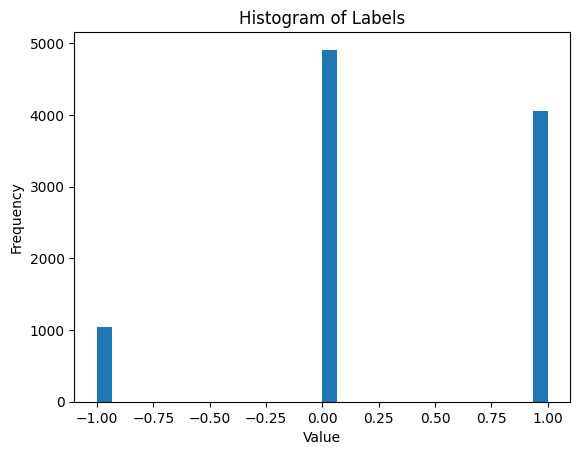

In [16]:
#Exploring distribution of the dataset
# Selecting numerical and categorical columns
numerical_columns = train.select_dtypes(exclude=['object'])

# Histogram of a numerical column
plt.hist(numerical_columns['label'], bins=30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Labels')
plt.show()

The labels 0 have higher frequency as shown in the histogram. Most of the tweets response is neutral responses.




<ipython-input-17-ee109adb35f0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


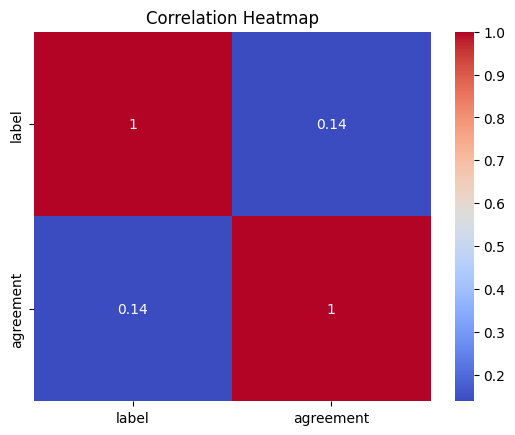

In [17]:
#checking correlation analysis
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

There is a positive relationship between labels and agreements of 0.14 which indicates there is no linear relationship between the variables.

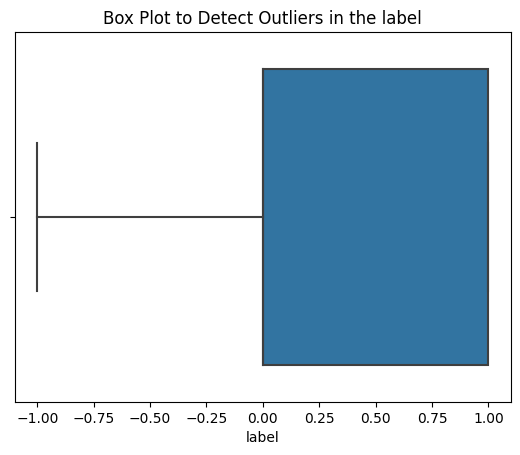

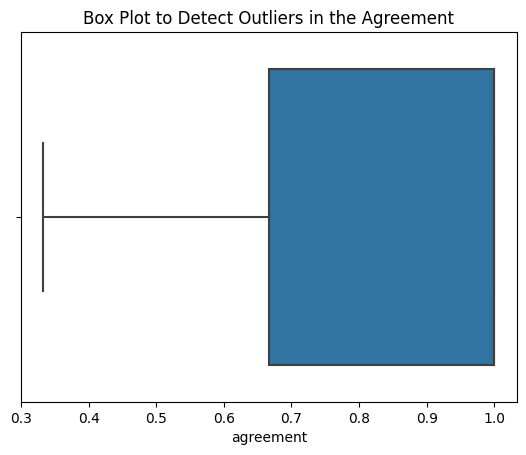

In [18]:
#checking for outliers in the agreement and labels
sns.boxplot(data=train, x='label')
plt.title('Box Plot to Detect Outliers in the label')
plt.show()

sns.boxplot(data=train, x='agreement')
plt.title('Box Plot to Detect Outliers in the Agreement')
plt.show()

From the box plots there are not outliers in the datasets

In [19]:
#checking for null values
train.isnull().sum(), test.isnull().sum()

(tweet_id     0
 safe_text    0
 label        0
 agreement    0
 dtype: int64,
 tweet_id     0
 safe_text    0
 dtype: int64)

There are no missing values in the train and test datasets.

## 2. SPLITTING THE DATASETS FOR MODELLING
Using traintest split we are going to split the train to train set where the model can learn and evaluation set where we can compute the metric scores

In [20]:
# Split the train data => {train, eval}
train_set, eval = train_test_split(train, test_size=0.2, random_state=42, stratify=train['label'])

In [21]:
#preview
train_set.head(5)

,tweet_id,safe_text,label,agreement
9305,YMRMEDME,Mickey's Measles has gone international <url>,0.0,1.000000
3907,5GV8NEZS,S1256 [NEW] Extends exemption from charitable ...,0.0,1.000000
795,EI10PS46,<user> your ignorance on vaccines isn't just ...,1.0,0.666667
5793,OM26E6DG,Pakistan partly suspends polio vaccination pro...,0.0,1.000000
3431,NBBY86FX,In other news I've gone up like 1000 mmr,0.0,1.000000


In [22]:
eval.head(5)

,tweet_id,safe_text,label,agreement
6571,R7JPIFN7,Children's Museum of Houston to Offer Free Vac...,1.0,1.000000
1754,2DD250VN,<user> no. I was properly immunized prior to t...,1.0,1.000000
3325,ESEVBTFN,<user> thx for posting vaccinations are impera...,1.0,1.000000
1485,S17ZU0LC,This Baby Is Exactly Why Everyone Needs To Vac...,1.0,0.666667
4175,IIN5D33V,"Meeting tonight, 8:30pm in room 322 of the stu...",1.0,1.000000


In [23]:
#checking shapes of the splitted sets
train_set.shape, eval.shape


((7999, 4), (2000, 4))

In [27]:
# Save splitted subsets
#train.to_csv("/content/drive/My Drive/Azubi-Africa--P5-Natural-Language-Processing-Project-Sentiment-Analysis/data/train_subset.csv", index=False)
#eval.to_csv("/content/drive/My Drive/Azubi-Africa--P5-Natural-Language-Processing-Project-Sentiment-Analysis/data/eval_subset.csv", index=False)

In [28]:
dataset = load_dataset('csv',
                        data_files={'train_set': '/content/drive/My Drive/Azubi-Africa--P5-Natural-Language-Processing-Project-Sentiment-Analysis/data/train_subset.csv',
                        'eval': '/content/drive/My Drive/Azubi-Africa--P5-Natural-Language-Processing-Project-Sentiment-Analysis/data/eval_subset.csv'}, encoding = "ISO-8859-1")


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train_set split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

# 3. Modelling - Data Preposessing, Model training and evaluation

### Model 1: Bert-Base-Cased

In [29]:
#transforming the datasets
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [30]:
def transform_labels(label):

    label = label['label']
    num = 0
    if label == -1: #'Negative'
        num = 0
    elif label == 0: #'Neutral'
        num = 1
    elif label == 1: #'Positive'
        num = 2

    return {'labels': num}

def tokenize_data(example):
    return tokenizer(example['safe_text'], padding='max_length')

# Change the tweets to tokens that the models can exploit
dataset = dataset.map(tokenize_data, batched=True)

# Transform	labels and remove the useless columns
remove_columns = ['tweet_id', 'label', 'safe_text', 'agreement']
dataset = dataset.map(transform_labels, remove_columns=remove_columns)

Map:   0%|          | 0/9999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/9999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [31]:
#previewing the dataset
dataset

DatasetDict({
    train_set: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 9999
    })
    eval: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 2000
    })
})

### Model Training

In [32]:
#Training argurments/parameters
batch_size = 16
# Configure the trianing parameters like `num_train_epochs`:
# the number of time the model will repeat the training loop over the dataset
training_args = TrainingArguments("test_trainer", num_train_epochs=3, load_best_model_at_end=True,push_to_hub=True,
                                  evaluation_strategy="steps",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    logging_steps = batch_size,
    save_steps= batch_size,
    save_strategy="steps",
    learning_rate=2e-5,
    weight_decay = 0.01
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [33]:
# Loading a pretrain model while specifying the number of labels in our dataset for fine-tuning
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
#pushing model to hugging face
#model.push_to_hub()

TypeError: ignored

In [35]:
#pushing model tokenizer


In [36]:
#reshuffling the train and eval sets to introduce randomness
train_dataset = dataset['train_set'].shuffle(seed=10)
eval_dataset = dataset['eval'].shuffle(seed=10)

In [37]:
# Instatiate The Trainer
trainer = Trainer(
    model=model, args=training_args, train_dataset=train_dataset, eval_dataset=eval_dataset
)

In [38]:
#trainer.push_to_hub()

In [40]:
#model training
trainer.train()

Step,Training Loss,Validation Loss
16,0.754200,0.721178
32,0.755700,0.727183
48,0.762900,0.685170
64,0.717300,0.679876
80,0.770400,0.662984
96,0.662100,0.655650
112,0.670500,0.649709
128,0.664800,0.673643
144,0.714900,0.629472
160,0.686400,0.624915


TrainOutput(global_step=1875, training_loss=0.49657036145528155, metrics={'train_runtime': 11750.6372, 'train_samples_per_second': 2.553, 'train_steps_per_second': 0.16, 'total_flos': 7892613191586816.0, 'train_loss': 0.49657036145528155, 'epoch': 3.0})

### Model evaluation

In [42]:
import numpy as np
from datasets import load_metric
#Compute the metric
metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

<ipython-input-42-41e55c9b0e60>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [43]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

In [44]:
# Launch the final evaluation
trainer.evaluate()

{'eval_loss': 0.22290892899036407,
 'eval_accuracy': 0.9235,
 'eval_runtime': 61.5773,
 'eval_samples_per_second': 32.48,
 'eval_steps_per_second': 2.03}

Here we are going to push our trainer to hugging face and save model and tokenizer and trainer to our local machine.

In [48]:
# Save the model to your local directory
#model.save_pretrained('C:/Users/Natural-Language-Processing-Project-Sentiment-Analysis/model')
#tokenizer.save_pretrained("C:/Users-Natural-Language-Processing-Project-Sentiment-Analysis/tokenizer")
#trainer.save_pretrained('C:/Users-Natural-Language-Processing-Project-Sentiment-Analysis/trainer')

('C:/Users/marth/OneDrive - Azubi Africa/Sprints/LP5/Azubi-Africa--P5-Natural-Language-Processing-Project-Sentiment-Analysis/tokenizer/tokenizer_config.json',
 'C:/Users/marth/OneDrive - Azubi Africa/Sprints/LP5/Azubi-Africa--P5-Natural-Language-Processing-Project-Sentiment-Analysis/tokenizer/special_tokens_map.json',
 'C:/Users/marth/OneDrive - Azubi Africa/Sprints/LP5/Azubi-Africa--P5-Natural-Language-Processing-Project-Sentiment-Analysis/tokenizer/vocab.txt',
 'C:/Users/marth/OneDrive - Azubi Africa/Sprints/LP5/Azubi-Africa--P5-Natural-Language-Processing-Project-Sentiment-Analysis/tokenizer/added_tokens.json',
 'C:/Users/marth/OneDrive - Azubi Africa/Sprints/LP5/Azubi-Africa--P5-Natural-Language-Processing-Project-Sentiment-Analysis/tokenizer/tokenizer.json')

In [49]:
#pushing trainer to hugging face
trainer.push_to_hub()

events.out.tfevents.1699183402.352e9e2d4939.190.0:   0%|          | 0.00/60.1k [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

events.out.tfevents.1699195628.352e9e2d4939.190.1:   0%|          | 0.00/346 [00:00<?, ?B/s]

'https://huggingface.co/MarthaK-Coder/test_trainer/tree/main/'